<a href="https://colab.research.google.com/github/JMML2021/Sprint-7.-Algoritmes-d-aprenentatge-supervisat-Classificaci-/blob/main/Sprint_7_Algoritmes_d%E2%80%99aprenentatge_supervisat_Classificacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
 

In [108]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [109]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
# Abro el fichero
 
path = ('/content/drive/MyDrive/01_COLAB/wineData.txt')

    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]

Hay  177 filas con 14 columnas

Imprimo el primer registro, solo para ver como es:



1           1.00
14.23      13.20
1.71        1.78
2.43        2.14
15.6       11.20
127       100.00
2.8         2.65
3.06        2.76
.28         0.26
2.29        1.28
5.64        4.38
1.04        1.05
3.92        3.40
1065     1050.00
Name: 0, dtype: float64

In [111]:
#Let's import the data from sklearn
from sklearn.datasets import load_wine
wine=load_wine()

#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [112]:
Nombre_Columnas  = ['target','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

In [113]:
# Asigno una lista con los nombres de las columnas

df1.columns = Nombre_Columnas
df1.iloc[0]

target                             1.00
alcohol                           13.20
malic_acid                         1.78
ash                                2.14
alcalinity_of_ash                 11.20
magnesium                        100.00
total_phenols                      2.65
flavanoids                         2.76
nonflavanoid_phenols               0.26
proanthocyanins                    1.28
color_intensity                    4.38
hue                                1.05
od280/od315_of_diluted_wines       3.40
proline                         1050.00
Name: 0, dtype: float64

In [114]:
# Search for missing, NA and null values)


(df1.isnull() | df1.empty | df1.isna()).sum()

target                          0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [115]:
df1.columns

Index(['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

# Data analysis
Basic statistical analysis

##Basic statistical analysis

In [116]:
#Let's show a summary of teh dataset where we can see 
# the basic statistic data.
df1.describe()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [117]:
#Let's see the frequency of the variable target.
#Convert variable to categorical.
data.target=data.target.astype('int64').astype('category')

#Frequency.
freq=df1['target'].value_counts()

freq

2    71
1    58
3    48
Name: target, dtype: int64

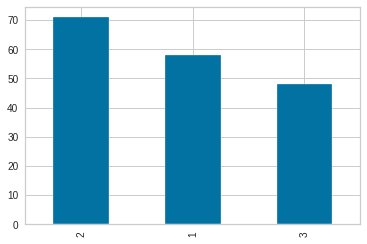

In [118]:
#Let's check graphically.
freq.plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d780ec90>,
      dtype=object)

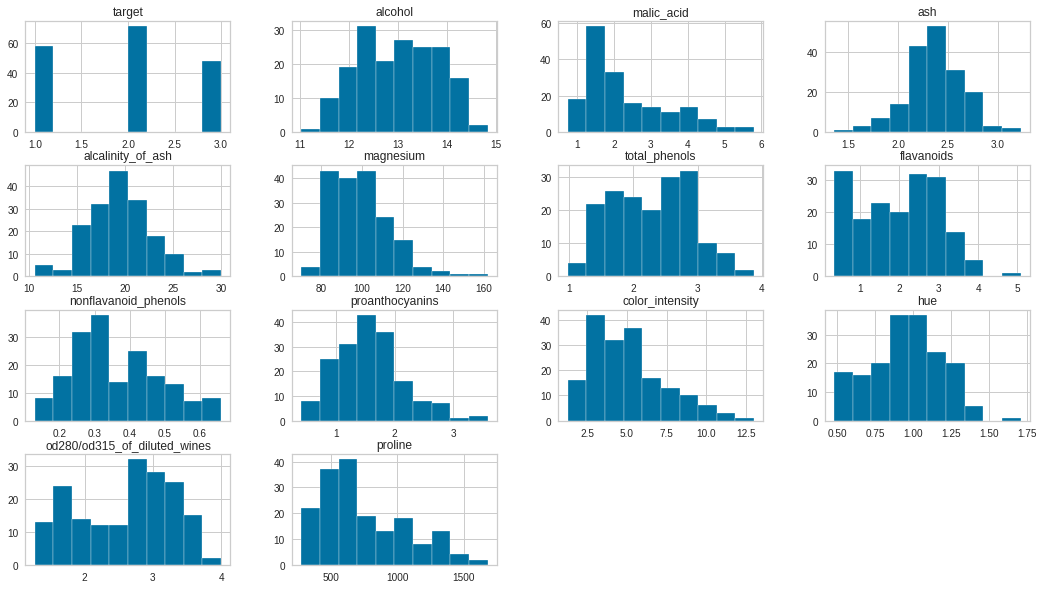

In [119]:
#Let's show the histograms of the variables alcohol, magnesium y color_intensity.
#Histogramas
 
df1[df1.columns].hist(figsize=(18,10))

https://www.alldatascience.com/classification/wine-dataset-analysis-with-python/

En los puntos anteriores vemos como todas las variables del conjunto de datos, excepto la variable **target**, son numéricas continuas. 

No faltan valores en ninguna de las variables. De los valores estadísticos básicos podemos ver que ninguna de las variables sigue una distribución normal, ya que ninguna tiene media 0 y desviación estándar 1. 

En los histogramas podemos observar como la variable alcohol tiene una distribución más o menos centrada, con la mayoría de las registros que tienen valores entre 12 y 14 grados, en cuanto a color_intensity y magnesio, observamos que sus distribuciones están sesgadas a la izquierda.

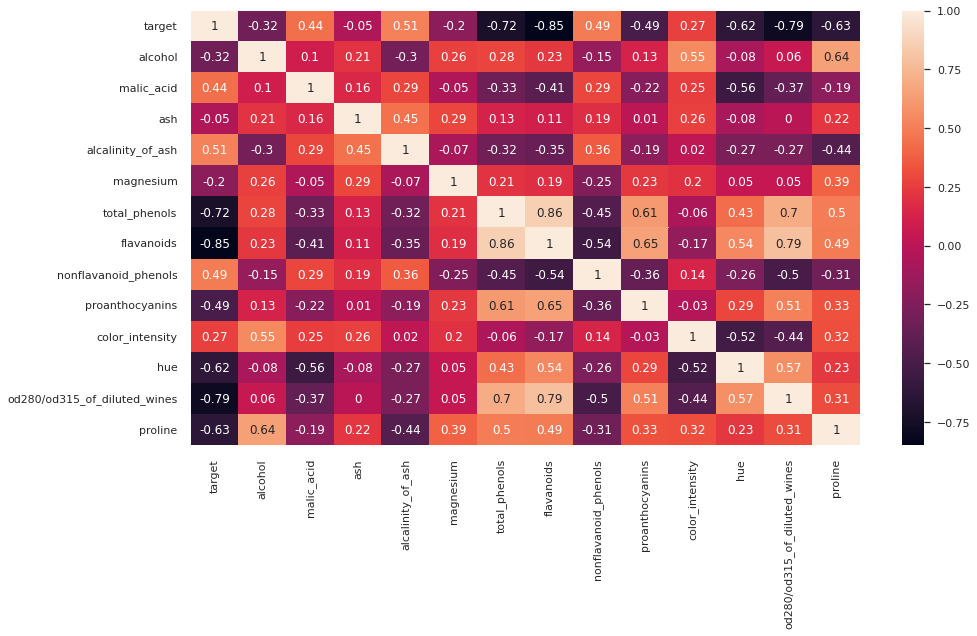

In [120]:
correlation_matrix = df1.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=correlation_matrix, annot=True)

# PCA

In [121]:
#Import standardscaler
from sklearn.preprocessing import StandardScaler

#Remove target columns.
x = df1.loc[:,data.columns != 'target'].values
y = df1.loc[:,['target']].values

#Scale the data
x= pd.DataFrame(StandardScaler().fit_transform(x))
y=pd.DataFrame(y)
# Create PCA object.
pca = PCA(n_components=2)

#Run PCA.
pComp=pca.fit_transform(x)

principalDf = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2'])

principalDf.head()

,PC 1,PC 2
0,-2.379345,-0.486518
1,-2.469807,1.152548
2,-3.254438,2.726935
3,-1.414881,1.348923
4,-2.657918,1.864433


In [122]:
# Join again the target variable

finalDf = pd.concat([principalDf, data[['target']]], axis = 1)
finalDf.head()

,PC 1,PC 2,target
0,-2.379345,-0.486518,0
1,-2.469807,1.152548,0
2,-3.254438,2.726935,0
3,-1.414881,1.348923,0
4,-2.657918,1.864433,0


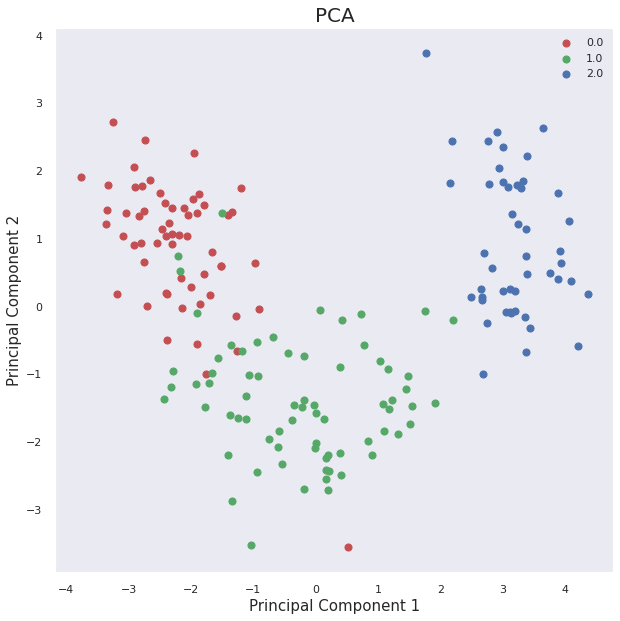

In [123]:
# Show the graphics.
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Normalizo los datos

In [124]:
# Normalizo los datos para evitar que las columnas de valores grandes 
# se impongan a las columnas de valores pequeños:


from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(df1.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df1.copy(), 4)
df3= pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

df3

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1.368871,0.888171,2.965658,0.305655,0.295509,-0.324579,-0.980097,-1.419361,1.268570,-0.924589,1.141219,-1.387314,-1.229247,-0.016230
173,1.368871,0.503803,1.406725,0.415023,1.047020,0.170684,-0.788003,-1.278776,0.544517,-0.310476,0.968647,-1.124717,-1.485253,0.015618
174,1.368871,0.342617,1.738222,-0.387012,0.145207,1.444215,-1.124168,-1.339027,0.544517,-0.415753,2.219795,-1.606145,-1.485253,0.286324
175,1.368871,0.218628,0.224086,0.014006,0.145207,1.444215,-1.028121,-1.349068,1.349020,-0.222746,1.831507,-1.562379,-1.399918,0.302248


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d5b1d350>,
      dtype=object)

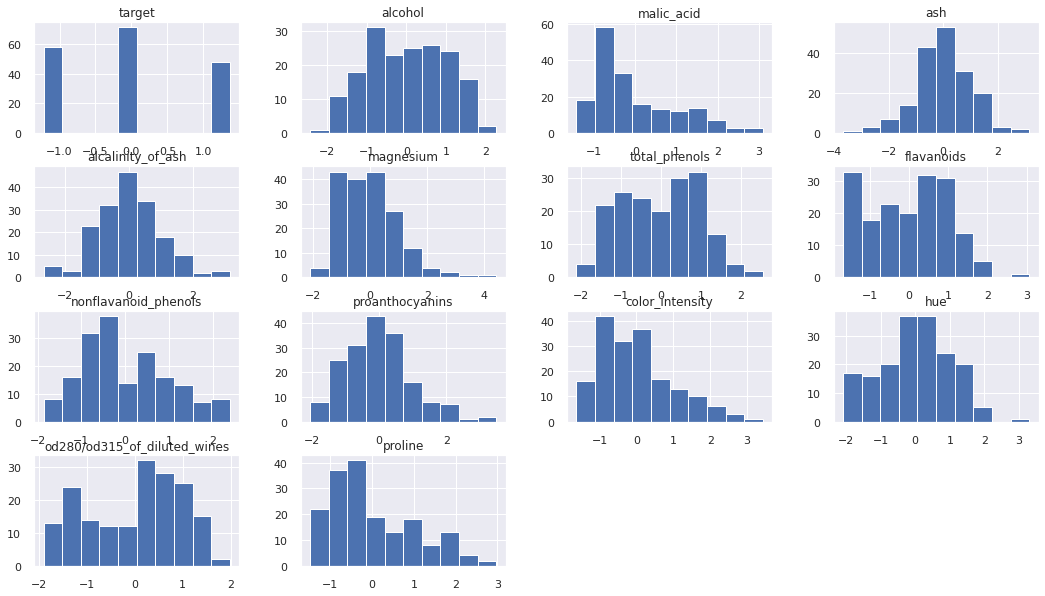

In [125]:
df3[df3.columns].hist(figsize=(18,10))

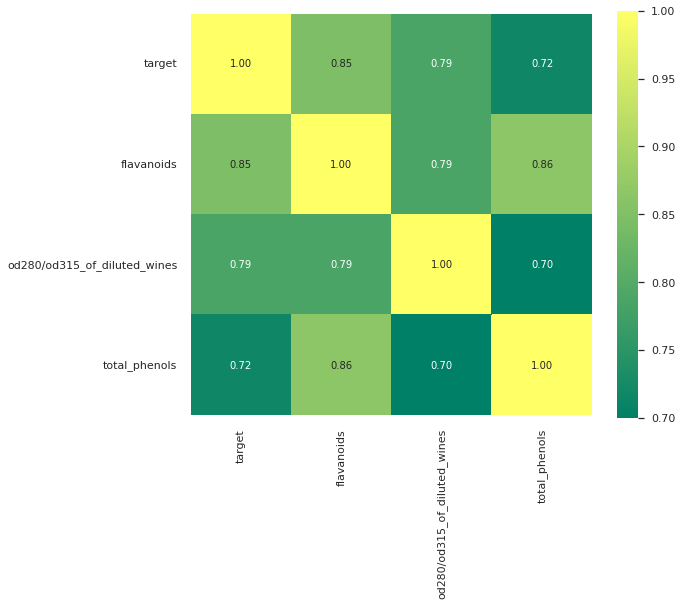

In [126]:
# Quiero ver que variables tienen mas correlacion con respecto al target


columns_sorted = df3.corr().abs().nlargest(4, 'target').index
correlation_sorted = np.corrcoef(df3[columns_sorted].values.T)

f, ax = plt.subplots(figsize = (9,7.5))
hm = sns.heatmap(abs(correlation_sorted), annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns_sorted.values, xticklabels=columns_sorted.values, cmap='summer')
plt.show()

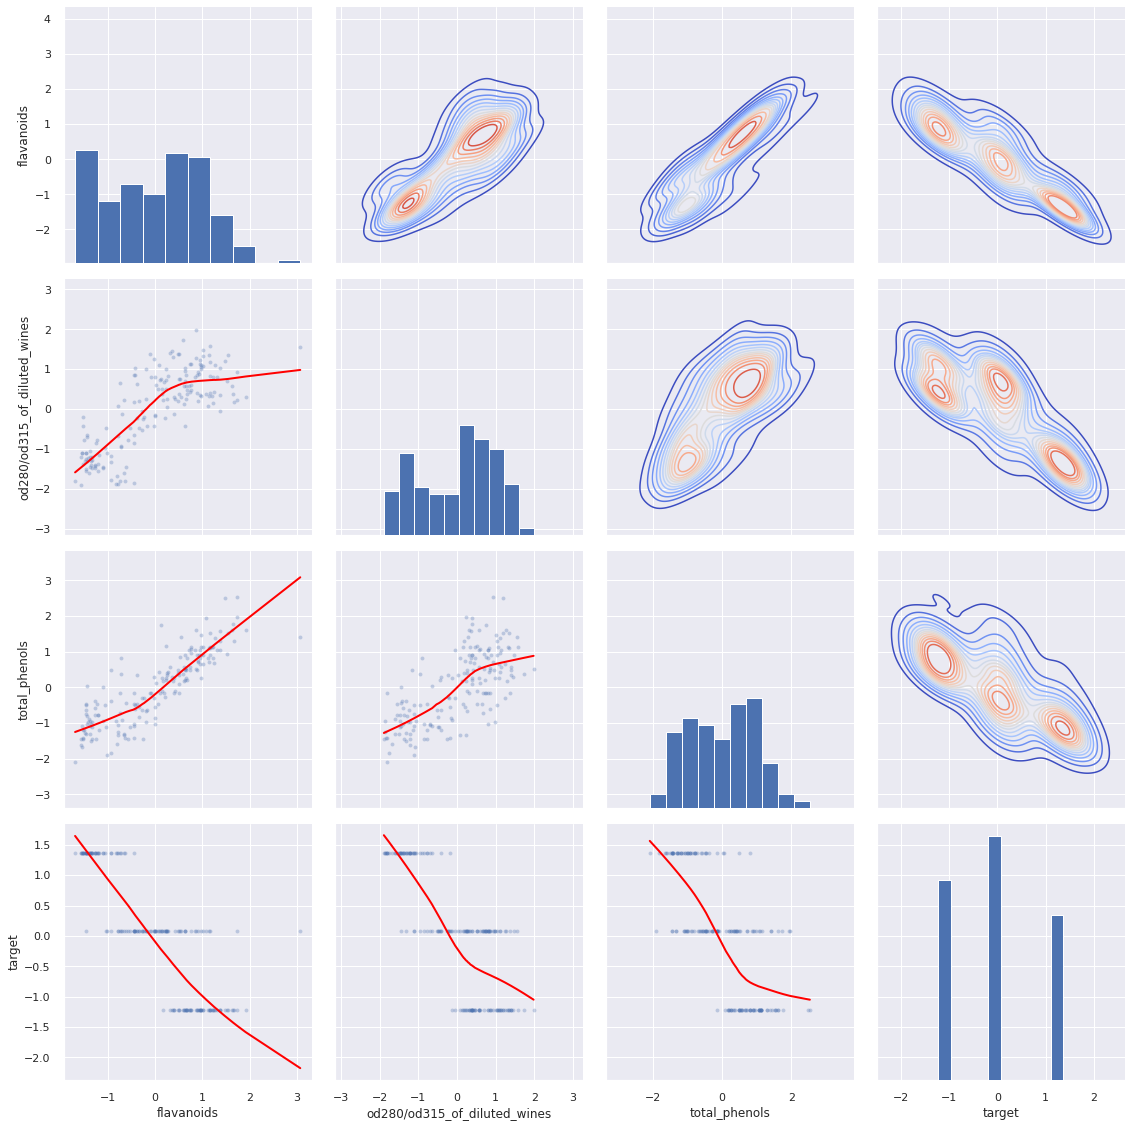

In [127]:
# Dibujar relaciones entre los datos de una manera visual de las 3 variables 
# con mas correlacion con la salida:

sns.set(rc={'figure.figsize':(15, 10)})

ColumnasCorrelacionAlta  = [ 'flavanoids','od280/od315_of_diluted_wines', 'total_phenols', 'target',] 
                             
g = sns.PairGrid(df3, vars=ColumnasCorrelacionAlta, height=4, aspect=1)
g = g.map_diag(plt.hist)
g = g.map_lower(sns.regplot, lowess=True, scatter_kws={'s': 15, 'alpha':0.3}, 
                line_kws={'color':'red', 'linewidth': 2})
g = g.map_upper(sns.kdeplot, n_levels=15, cmap='coolwarm')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
plt.show()

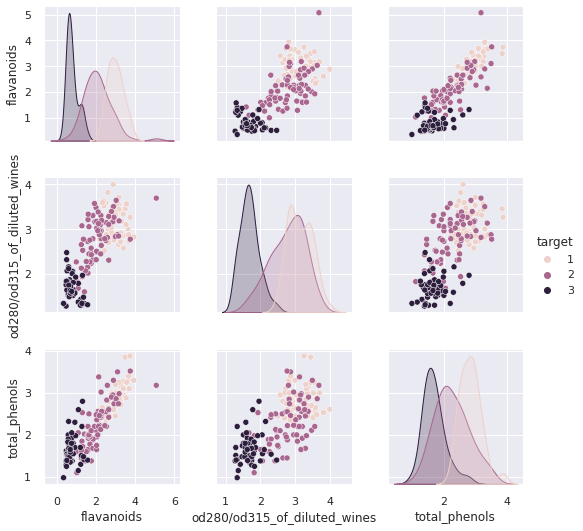

In [128]:
#scatter plots 

df2 = df1[['flavanoids','od280/od315_of_diluted_wines', 'total_phenols', 'target']]
sns.pairplot(df2,hue='target')

# Subrutinas Necesarias

## Dibujar Matriz Confusion

In [129]:
# Dibujar Matriz de Confusion


def DibujarMatrizConfusion (y_test, y_pred):
  print('Hola')
  confusion_matrix = confusion_matrix(y_test, y_pred)
  print(confusion_matrix)

  plt.matshow(confusion_matrix, cmap=plt.cm.gray)
  plt.show()

## Calculo metricas de los modelos

In [168]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

def metricas(modelo, y_test, y_pred):


    # Model Accuracy: how often is the classifier correct?
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", Accuracy)

    # Model Precision: what percentage of positive tuples are labeled as such?
    Precision = metrics.precision_score(y_test, y_pred, pos_label='positive', average= 'micro')
    print("Precision:", Precision)

    # Model Recall: what percentage of positive tuples are labelled as such?
    Recall = metrics.recall_score(y_test, y_pred, pos_label='positive', average= 'micro')
    print("Recall:", Recall)


    # Guardo metricas (  Accuracy, Precision, Recall) para ejercicio 2:
    metricasEjercicio2.append([modelo, Accuracy, Precision, Recall])

    print('Error rate: {:.2f}'.format(1 - accuracy_score(y_test, y_pred)))

## Validacion Cruzada

In [172]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
def validacionCruzada(modelo, x, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate the model and collect the scores
  n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # report the model performance
  print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# - Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [130]:
# GUardaré las metricas

metricasEjercicio2 = []

## SVM Support Vector Machines con Scikit-learn

https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

In [147]:
# Sparar datosn en Train y Test
from sklearn.model_selection import train_test_split

# Creo la columna X e Y:
datos_x = df1.loc[:,data.columns != 'target'].values
datos_y = df1.loc[:,['target']].values

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, test_size=0.3,random_state=109) # 70% training and 30% test

In [148]:
#Importo modelo SVM
from sklearn import svm

#Creo el clasificador
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [145]:
metricas(y_test, y_pred)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [150]:
#DibujarMatrizConfusion (y_test, y_pred)

Hola


UnboundLocalError: ignored

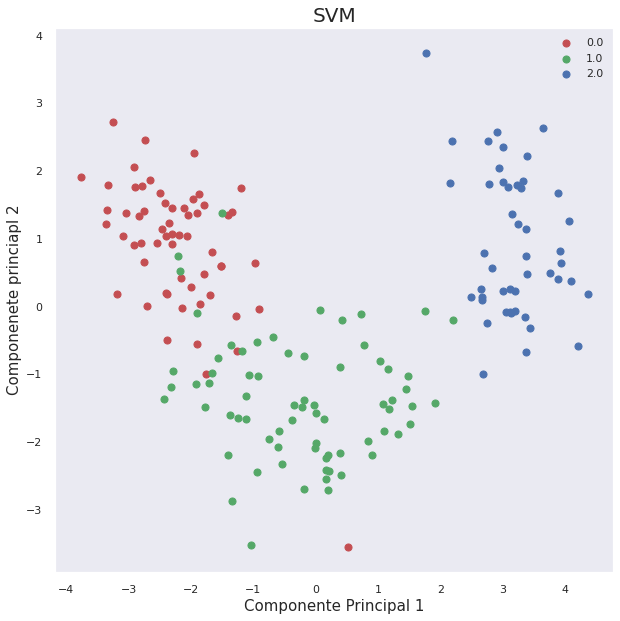

In [134]:
# Muestro los Datos:

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componenete princiapl 2', fontsize = 15)
ax.set_title('SVM', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [146]:
# Dibujar Matriz de Confusion

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

TypeError: ignored

## XGBoost


https://www.datacamp.com/tutorial/xgboost-in-python

In [136]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Creo la columna X e Y:
datos_x = df1.loc[:,data.columns != 'target'].values
datos_y = df1.loc[:,['target']].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, test_size=0.3,random_state=109) # 70% training and 30% test

data_dmatrix = xgb.DMatrix(data=datos_x,label=datos_y)

In [137]:
#Importo modelo XGBoost:

xg_reg = xgb.XGBRegressor(objective ="reg:squarederror", 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [138]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
Precision = metrics.precision_score(y_test, y_pred, pos_label='positive', average= 'micro')
print("Precision:", Precision)

# Model Recall: what percentage of positive tuples are labelled as such?
Recall = metrics.recall_score(y_test, y_pred, pos_label='positive', average= 'micro')
print("Recall:", Recall)


# Guardo metricas (  Accuracy, Precision, Recall) para ejercicio 2:
metricasEjercicio2.append(['XGBoost', Accuracy, Precision, Recall])

ValueError: ignored

In [139]:
# Dibujar Matriz de Confusion

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

TypeError: ignored

In [140]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

R_squared = r2_score(y_test, preds)

print("R-Squared: ", np.round(R_squared, 2))


RMSE: 0.646079
R-Squared:  0.35


In [141]:
print("Accuracy:", r2_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.34735043590601367


ValueError: ignored

In [ ]:
# Guardo metricas
metricasEjercicio2.append(['XGBoost',r2_score(y_test, y_pred),0.5,0.5])

In [ ]:
# Making the Prediction Error Plot

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from sklearn.metrics import mean_squared_error as mse


MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))

print("\nPrediction Error Plot")
print(prediction_error(xg_reg, X_train, y_train, X_test, y_test))

# Making the Residuals Plot
print("\nResiduals Plot")

#NO SON de la misma LONGITUD ERROR
#print(residuals_plot(xg_reg, X_train, y_train, X_test, y_test))

In [ ]:
# BORRAR peroblemas con SIZE
'''
from sklearn.model_selection import train_test_split as tts

# Creo la columna X e Y:
X = df1.loc[:,data.columns != 'target'].values
y = df1.loc[:,['target']].values

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
print(residuals_plot(xg_reg, X_train, y_train, X_test, y_test))
'''

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


# Creo la columna X e Y:
datos_x = df1.loc[:,data.columns != 'target'].values
datos_y = df1.loc[:,['target']].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, test_size=0.3,random_state=109) # 70% training and 30% test


'''

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [ ]:
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
# Buscar los mejores Hiperparametros de XGBoost:

from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

#regressor = XGBRegressor(tree_method='gpu_hist', random_state=0, objective='reg:squarederror')
#regressor.fit(X_train, y_train)
#xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, 
                            param_distributions=params, 
                            random_state=42, 
                            n_iter=200, 
                            cv=3, 
                            verbose=1, 
                            n_jobs=1, 
                            return_train_score=True)

search.fit(X_train,y_train)

report_best_scores(search.cv_results_, 1)

## Regresion Logistica

Regresión logística ordinal: la variable objetivo tiene tres o más categorías ordinales, como restaurante o calificación de producto de 1 a 5.

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(1.5,257.44,'Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

In [ ]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
Precision = metrics.precision_score(y_test, y_pred, pos_label='positive', average= 'micro')
print("Precision:", Precision)

# Model Recall: what percentage of positive tuples are labelled as such?
Recall = metrics.recall_score(y_test, y_pred, pos_label='positive', average= 'micro')
print("Recall:", Recall)


# Guardo metricas (  Accuracy, Precision, Recall) para ejercicio 2:
metricasEjercicio2.append(['Regresion Logistica', Accuracy, Precision, Recall])

In [ ]:
'''
# Guardo metricas
metricasEjercicio2.append(['Regresion Logistica', metrics.accuracy_score(y_test, y_pred), 
                           metrics.precision_score(y_test, y_pred, average='micro'),
                           metrics.recall_score(y_test, y_pred, average='micro')])

'''

In [ ]:




y_pred_proba = logreg.predict_proba(X_test)[::,1]

acc = metrics.accuracy_score(y_test, y_pred_proba)# To know the accuracy

One-vs-the-rest (OvR) multiclass strategy.


In [ ]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo


'''
# Creo la columna X e Y:
datos_x = df1.loc[:,data.columns != 'target'].values
datos_y = df1.loc[:,['target']].values

datos_y =datos_y.astype(str)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, test_size=0.3,random_state=109) # 70% training and 30% test



from sklearn.metrics import roc_auc_score

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)


ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')







model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
#lr_probs = lr_probs[:, 1]
# Calculamos el AUC

#testy = lr_probs
#ns_probs = 



ns_auc = roc_auc_score(testy, ns_probs, multi_class='ovo')

'''

'''
lr_auc = roc_auc_score(testy, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
'''


In [ ]:

# Multiclass case
'''

# Creo la columna X e Y:
datos_x = df1.loc[:,data.columns != 'target'].values
datos_y = df1.loc[:,['target']].values

datos_y =datos_y.astype(str)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, test_size=0.3,random_state=109) # 70% training and 30% test



from sklearn.metrics import roc_curve

clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)

lr_probs = clf.predict_proba(X_test)

ns_auc= roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))

#The ROC curve is created by plotting the true positive rate (TPR) against the 
# false positive rate (FPR) at various threshold settings. The true-positive rate
#  is also known as sensitivity, recall or probability of detection.



lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
'''

'''
lr_probs = model.predict_proba(X_test)


lr_auc = roc_auc_score(y_test, lr_probs)

print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC


#ns_fpr, ns_tpr, _ = roc_curve(y-test, lr_probss)
'''

'''



lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
'''

In [ ]:
'''

r_aucc = roc_auc_score(y_test, lr_probs, multi_class='ovr')

classes_q = sorted(np.unique(y_test))
classes_q
print(classes_q)
#lr_fpr, lr_tpr, thresholds= roc_curve(y_test[0], lr_probs, pos_label=classes_q)
'''

https://www.kaggle.com/code/tawejssh/red-wine-quality-classification-basic-ml/notebook

In [ ]:
#For ROC curves we have to binarize lables


'''
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc, precision_score, recall_score, f1_score, confusion_matrix


y_test_bin = label_binarize(y_test, classes=classes_q)
y_pred_bin = label_binarize(y_pred, classes=classes_q)
#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes_q)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    print(i, fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

'''

In [ ]:
#ROC for a specific class

'''
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

'''

In [ ]:
#ROC for multiclass #sklearn doc
# First aggregate all false positive rates

'''

from itertools import cycle

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_q))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_q)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(classes_q)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,5))
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'magenta'])
for i, color in zip(range(len(classes_q)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of quality {0} (area = {1:0.2f})'
             ''.format(classes_q[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


'''

## Utilizando Multinomial logistic regression

In [163]:
# Creo modelo Multinomial Regresion

log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [169]:
metricas('Regresion Logistica',y_test, y_pred)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Error rate: 0.00


In [153]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(y_test, y_pred)))

Accuracy: 1.00
Error rate: 0.00


Echemos un vistazo a las puntuaciones de la validación cruzada:

In [154]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.96      , 0.96      , 0.96      , 1.        , 0.91666667])

In [155]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.05)


In [156]:
# Dibujar Matriz de Confusion

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

TypeError: ignored

### Tune Penalty for Multinomial Logistic Regression

https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

In [ ]:

...
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [170]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.993 (0.019)


In [ ]:
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, x, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# - Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [ ]:
df5=pd.DataFrame(metricasEjercicio2)
df5 = df5.rename(columns = {0: 'Metodo', 1: 'Accuracy', 2: 'Precicison', 3: 'Recall'})
print(df5)
#plt.axhline(y=.55)
df5.plot(kind='bar',width=0.8,
             subplots=True,
             figsize=(13,8))

plt.show()

# - Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [157]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

                    #num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

Buscar mejores parametros de XGBoost


---



In [158]:
xg_reg = xgb.train(params=params, 
                   dtrain=data_dmatrix, 
                   num_boost_round=10)

[16:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [159]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [160]:
# Buscar los mejores Hiperparametros de XGBoost:

from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

#regressor = XGBRegressor(tree_method='gpu_hist', random_state=0, objective='reg:squarederror')
#regressor.fit(X_train, y_train)
#xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, 
                            param_distributions=params, 
                            random_state=42, 
                            n_iter=200, 
                            cv=3, 
                            verbose=1, 
                            n_jobs=1, 
                            return_train_score=True)

search.fit(X_train,y_train)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'colsample_bytree': 0.9248848696025762, 'gamma': 0.01523607636679708, 'learning_rate': 0.290164494322417, 'max_depth': 3, 'n_estimators': 134, 'subsample': 0.758865533001633}



# - Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

## Validacion Cruzada de XGoost

In [173]:
validacionCruzada(xg_reg, datos_x, datos_y)

Mean Accuracy: 0.976 (0.032)


## Validacion Cruzada Regresion Logistica

In [174]:
validacionCruzada(log_reg, datos_x, datos_y)

Mean Accuracy: 0.976 (0.032)


# - Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

## Normalizo los datos

In [ ]:
# Normalizo los datos para evitar que las columnas de valores grandes 
# se impongan a las columnas de valores pequeños:


from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(df1.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df1.copy(), 4)
df3= pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

df3

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1.368871,0.888171,2.965658,0.305655,0.295509,-0.324579,-0.980097,-1.419361,1.268570,-0.924589,1.141219,-1.387314,-1.229247,-0.016230
173,1.368871,0.503803,1.406725,0.415023,1.047020,0.170684,-0.788003,-1.278776,0.544517,-0.310476,0.968647,-1.124717,-1.485253,0.015618
174,1.368871,0.342617,1.738222,-0.387012,0.145207,1.444215,-1.124168,-1.339027,0.544517,-0.415753,2.219795,-1.606145,-1.485253,0.286324
175,1.368871,0.218628,0.224086,0.014006,0.145207,1.444215,-1.028121,-1.349068,1.349020,-0.222746,1.831507,-1.562379,-1.399918,0.302248


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d5b1d350>,
      dtype=object)

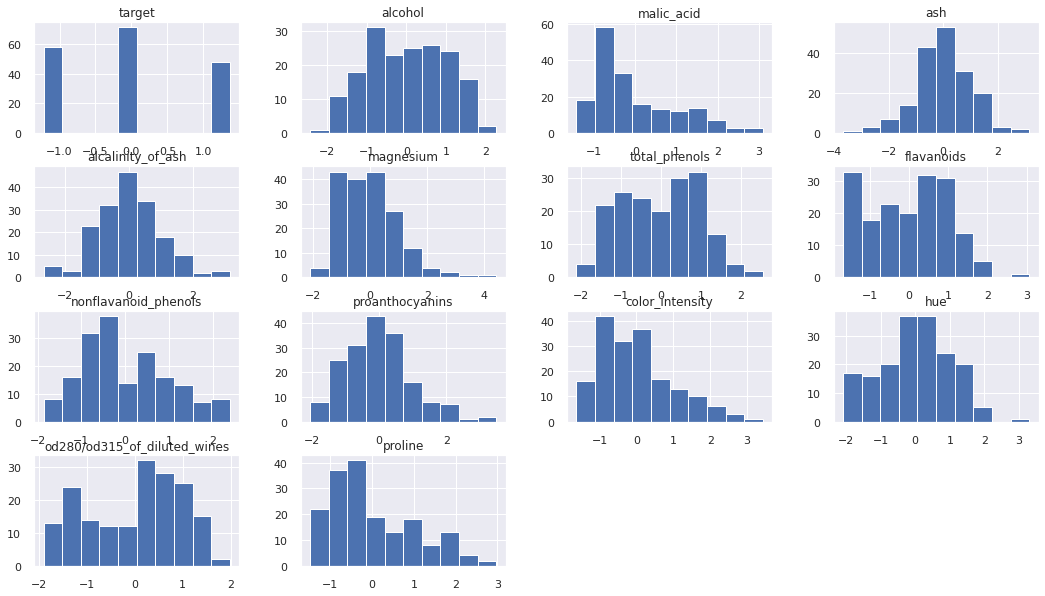

In [ ]:
df3[df3.columns].hist(figsize=(18,10))

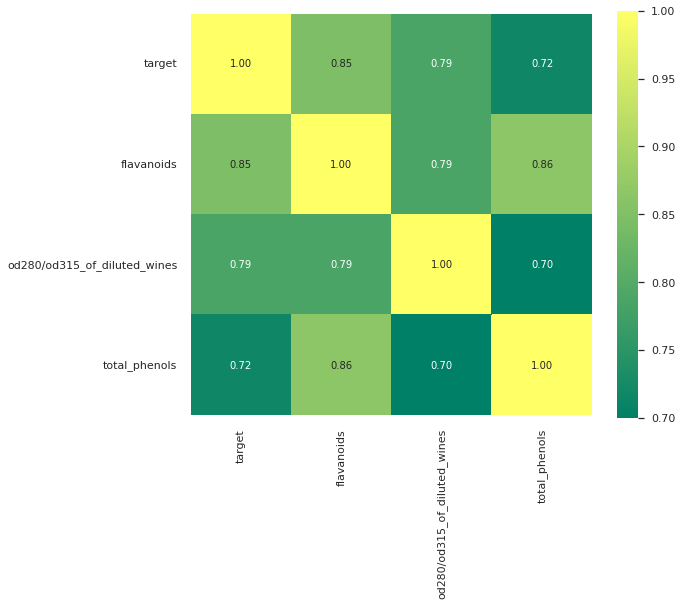

In [ ]:
# Quiero ver que variables tienen mas correlacion con respecto al target

columns_sorted = df3.corr().abs().nlargest(4, 'target').index
correlation_sorted = np.corrcoef(df3[columns_sorted].values.T)

f, ax = plt.subplots(figsize = (9,7.5))
hm = sns.heatmap(abs(correlation_sorted), annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns_sorted.values, xticklabels=columns_sorted.values, cmap='summer')
plt.show()

In [ ]:
# Creo los Data-sets de train y de test:

# Creo la columna X e Y:
datos_x = df3.loc[:,data.columns != 'target'].values
datos_y = df3.loc[:,['target']].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, test_size=0.3,random_state=109) # 70% training and 30% test

data_dmatrix = xgb.DMatrix(data=datos_x,label=datos_y)

In [ ]:
#Importo modelo XGBoost:

xg_reg = xgb.XGBRegressor(objective ="reg:squarederror", 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [175]:
metricas('XGBoost Normalizado', y_test, y_pred)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Error rate: 0.00


In [176]:
validacionCruzada(xg_reg, datos_x, datos_y)

Mean Accuracy: 0.976 (0.032)
